## Task 2 
## 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path
path = r'C:\Users\T\Desktop\career foundry\Phyton\Instacart Basket Analysis 30.10.24'

In [5]:
# Import the most up-to-date data frame
ords_prods_customers_merge =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','ords_prods_cust_merge_4.9_cust.pkl'))

## 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

In [7]:
#done

## 3- Create a histogram of the “order_hour_of_day” column

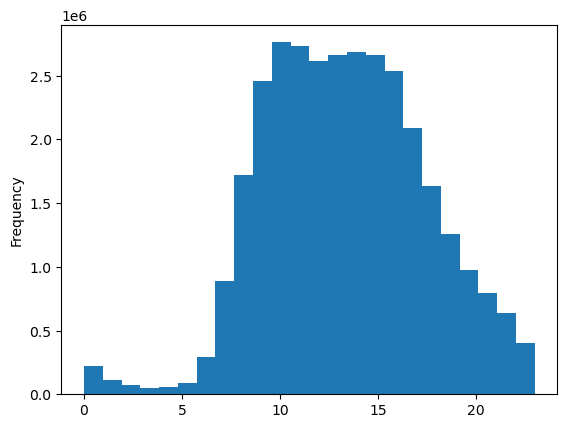

In [9]:
hist = ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 24)

#### A day is 24 hours, so I divided accordingly as bins.  We can see the frequency in the histogram.Nights have lower frequency, less orders. Mornings have the highest orders. It seems like the peek point is 9 am -10 am. After 4 pm the number of orders decrease. It shows the customers prefer buying in the morning hours through Instacart.

## 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

In [12]:
ords_prods_customers_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_day_of_week       int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   first_order             bool    
 7   product_id              float64 
 8   add_to_cart_order       float64 
 9   reordered               float64 
 10  _merge                  category
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  match                   category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

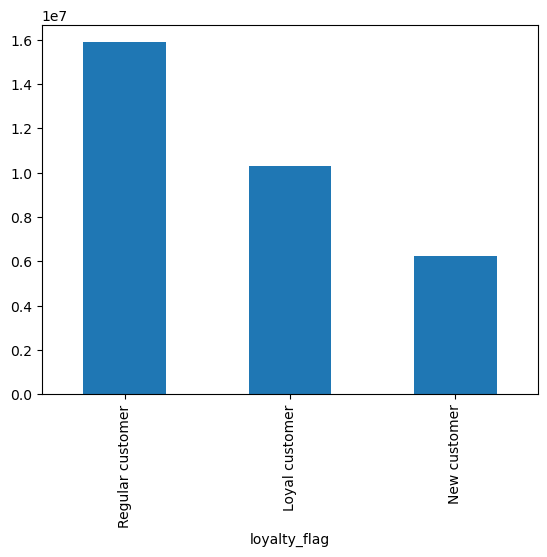

In [13]:
bar = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

## 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [15]:
# Create a random sample 
np.random.seed(4)

In [16]:
# Sampling Data 70/30
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big
big = ords_prods_customers_merge[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customers_merge[~dev]

In [19]:
# Checking the totals
len(ords_prods_customers_merge)

32404859

In [20]:
len(big) + len( small)

32404859

In [21]:
# A new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [22]:
df_2

,order_hour_of_day,prices
0,9,11.3
2,9,3.6
3,9,8.4
6,9,11.5
10,17,5.3
...,...,...
32404841,11,12.9
32404842,18,22.6
32404843,18,8.4
32404849,6,4.8


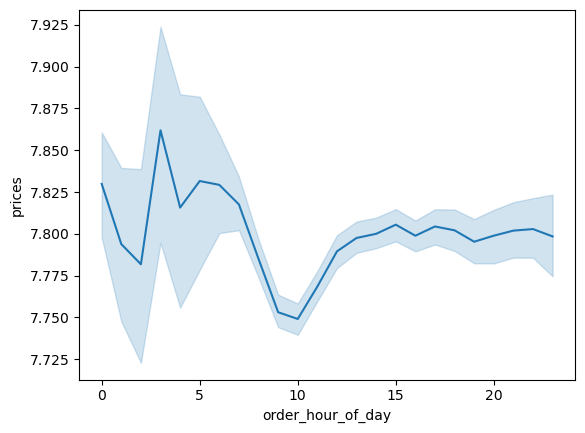

In [23]:
# Create the line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [25]:
# Create a new dataframe that contains only the "age" and "n_dependants" columns from small subset 
df_3 = small[['Age','Number_of_Dependents']] 

In [26]:
# Tobe able to see the prices and other hidden columns
pd.set_option('display.max_columns', None)

In [27]:
print(small.columns)


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'match',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'customer_frequency', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number_of_Dependents', 'Family Status', 'Income'],
      dtype='object')


In [28]:
df_3

,Age,Number_of_Dependents
0,57,3
2,57,3
3,57,3
6,57,3
10,43,2
...,...,...
32404841,45,3
32404842,74,2
32404843,74,2
32404849,81,1


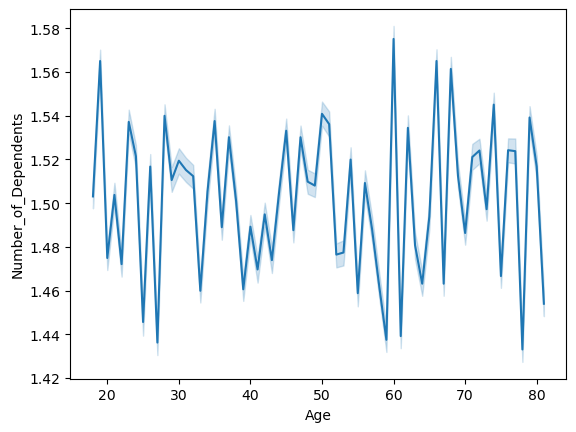

In [29]:
# Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'Number_of_Dependents')

#### There is no specific or meaningful frequency that I can come up with an idea if there is a correlation. Somehow age 60 has the most number of dependants

## 7 - You’ll also need to explore whether there’s a connection between age and spending power (income)

In [32]:
# To visualize this relationship, create a scatterplot using the sns.scatterplot() function
# Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['Age','Income']]

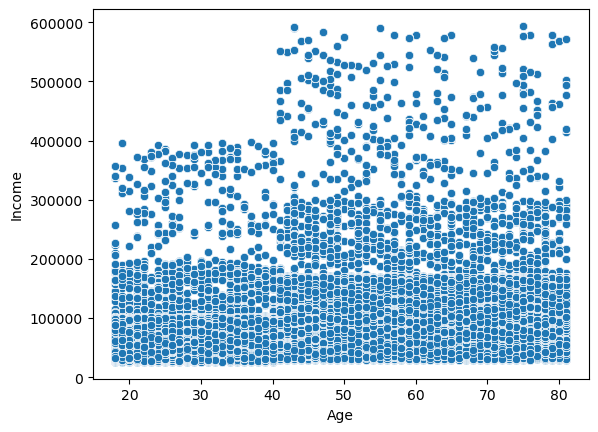

In [33]:
# Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'Age', y = 'Income')

#### The population with incomes lower than 200k, has more concentration.
#### Younger people (until 40 years old) have incomes mostly around 200k.
#### From 40 years old onwards, it is possible to identify three different patterns:
 ##### - High concentration - incomes lower than 200k (+/-)
 ##### - medium concentration - incomes between 200 and 300k
 ##### - lower concentration - incomes higher than 300k

## Step 8 - Export your visualizations as “.png” files in your relevant project folder

In [36]:
# Export Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [37]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [38]:
# Export Line chart - expenditure (the “prices” column) depending on the hour of the day
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_over_hours_of_day.png'))

In [39]:
# Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_n_dependents.png'))

In [40]:
# Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))